In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [31]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [32]:
control = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\control.csv")
irrad = pd.read_csv(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\irrad.csv")

CD44_control_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_CD44_control.xlsx", sheet_name = ["Prediction_Background"])
SABG_control_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_SABG_control.xlsx", sheet_name = ["Prediction_Background"])

control.CD44 = control.CD44 - np.mean(CD44_control_bg["Prediction_Background"].Mean)
control.SABG = control.SABG - np.mean(SABG_control_bg["Prediction_Background"].Mean)

CD44_irrad_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_CD44.xlsx", sheet_name = ["Prediction_Background"])
SABG_irrad_bg = pd.read_excel(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_SABG.xlsx", sheet_name = ["Prediction_Background"])

irrad.CD44 = irrad.CD44 - np.mean(CD44_irrad_bg["Prediction_Background"].Mean)
irrad.SABG = irrad.SABG - np.mean(SABG_irrad_bg["Prediction_Background"].Mean)

raw_data = pd.concat ([control, irrad], ignore_index=True)
labels = raw_data.Culture
data = raw_data.drop('Culture', axis=1)
c_labels = data.keys()
data = data.values

print (raw_data)

    Culture     SABG      CD44
0   Control  0.56254  17.81746
1   Control  0.45354  14.74346
2   Control  0.30354  15.43146
3   Control  0.42354  13.86246
4   Control  0.25754  13.30346
5   Control  0.22454  11.73446
6   Control  0.33454  13.21146
7   Control  0.60854  13.18246
8   Control  0.47354  12.36446
9   Control  0.34754  12.18146
10  Control  0.22954  13.12446
11  Control  0.38754  15.59746
12  Control  0.29354  17.54546
13  Control  0.70654  15.13846
14  Control  0.28654  17.37846
15  Control  0.36454  14.86446
16  Control  0.37654  14.74646
17  Control  0.34254  13.14146
18  Control  0.35154  13.26546
19  Control  0.30554  15.74546
20  Control  0.70254  12.42946
21  Control  0.32854  13.98046
22  Control  0.28254  13.35346
23  Control  0.50954  15.50346
24  Control  0.31354  15.35846
25  Control  0.56954  14.53446
26  Control  0.32854  15.55046
27  Control  0.34554  14.57246
28  Control  0.40054  16.53146
29  Control  0.42954  13.87846
30    Irrad  2.23858  11.01118
31    Ir

In [33]:
pca = PCA()
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', pca)])
X_r = pipeline.fit_transform(data)

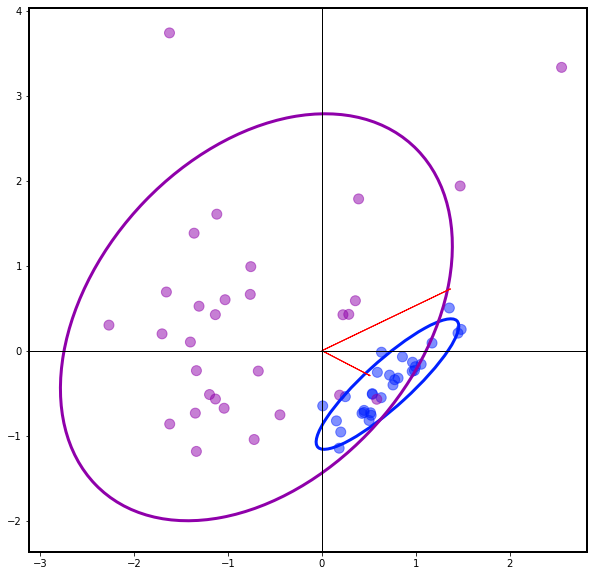

In [36]:
fig, axs = plt.subplots(figsize = [10,10])

axs.spines["top"].set_linewidth(2)
axs.spines["left"].set_linewidth(2)
axs.spines["right"].set_linewidth(2)
axs.spines["bottom"].set_linewidth(2)

palette = {"Control":"#0020ff", 
           "Irrad":"#8F00AA"}

plt.scatter (X_r[:,0], X_r[:,1], c=[palette[x] for x in labels], cmap=plt.cm.Set1, alpha = 0.5, s=100)

control_data = X_r[labels=="Control"]
irrad_data = X_r[labels=="Irrad"]

confidence_ellipse (control_data[:,0], control_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#0020ff", linewidth=3)
confidence_ellipse (irrad_data[:,0], irrad_data[:,1], ax = axs, n_std = 2.0, edgecolor = "#8F00AA", linewidth=3)

xs = X_r[0]
ys = X_r[1]

for i, varnames in enumerate (c_labels):
    plt.arrow (0, 0,
              xs[i],
              ys[i],
              color = 'r',
              head_width = 0.01)
#     plt.text(xs[i], ys[i], varnames, size = 15)
    
xmin, xmax = plt.xlim()
plt.xlim(xmin,xmax)
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x-x, c = 'black', linewidth = 1)

ymin, ymax = plt.ylim()
plt.ylim(ymin,ymax)
y = np.linspace(ymin, ymax, 1000)
plt.plot (y-y, y, c = 'black', linewidth = 1)
    
# axs.axes.xaxis.set_visible(False)
# axs.axes.yaxis.set_visible(False)

In [35]:
print(pca.explained_variance_ratio_)

[0.54141109 0.45858891]
